Analyze employee churn, Why employees are leaving the company, and How to predict, who will leave the company?

We will implement the following topics :-
1. Employee Churn Analysis
2. Data loading and understanding feature
3. Exploratory data analysis and data visualization
4. Cluster analysis
5. Building a prediction model using a Gradient Boosting Tree.
6. Evaluating model performance
7. Conclusion

1. Employee Churn Analysis

Employee churn is the overall turnover in an organization's staff as existing employees leave and new ones are hired. The churn rate is usually calculated as the percentage of employees leaving the company over some specified time period.

As noted churn may affected by age, tenure, pay, job satisfaction, salary, working conditions and growth potential.

2. Exploratory Analysis
Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

In [23]:
#import modules
import pandas as pd #dataframes
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #plotting unique graphs
%matplotlib inline

In [24]:
#Loading Dataset
data=pd.read_csv("employee_churn.csv")
data.head() #For first five observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
data.tail() #For last five observations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [26]:
data.info() #attriutes names and datatypes using info()
#This dataset has 14999 samples, and 10 attributes
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


You can describe 10 attributes in detail as:
1. satisfaction_level: It is the employee satisfaction point, which ranges from 0–1.
2. last_evaluation: It is evaluated performance by the employer, which also ranges from 0–1.
3. number_projects: How many numbers of projects assigned to an employee?
4. average_monthly_hours: How many average numbers of hours worked by an employee in a month?
5. time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
6. work_accident: Whether an employee has had a work accident or not.
7. promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
8. Departments: Employee’s working department/division.
9. Salary: Salary level of the employee such as low, medium, and high.
10. left: Whether the employee has left the company or not.

We have two types of employee one who stayed and another who left the company. So, we can divide data into two groups and compare their characteristics. Here, we can find the average of both the groups using groupby() and mean() function.

In [27]:
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here you can interpret, Employees who left the company had low satisfaction levels, low promotion rate, low salary, and worked more compare to those who stayed in the company.

In [28]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

We can see out of 15000 approx 3571 were left and 11428 stayed. The no of employees left is 23 % of the total employment.

describe function returns the count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.

In [29]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Data Visualization

We can plot a bar graph using Matplotlib. the bar graph is suitable for showing discrete variable counts.

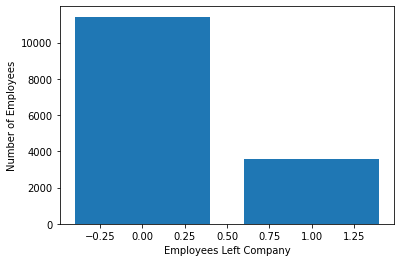

In [30]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

We can see out of 15000 approx 3571 were left and 11428 stayed. The no of employees left is 23 % of the total employment.

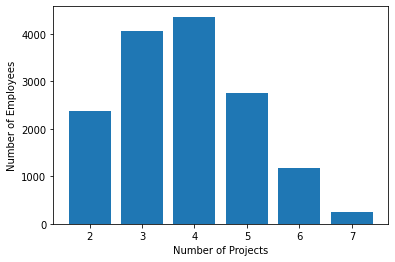

In [31]:
#Number of Project
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3–5.

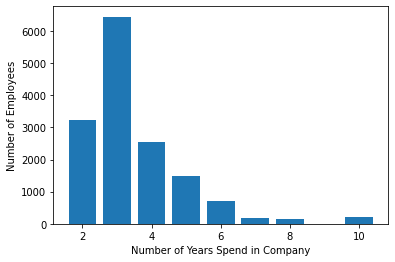

In [32]:
#Time Spent in Company
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2–4 years. Also, there is a huge gap between 3 years and 4 years of experienced employees.

Subplots using Seaborn

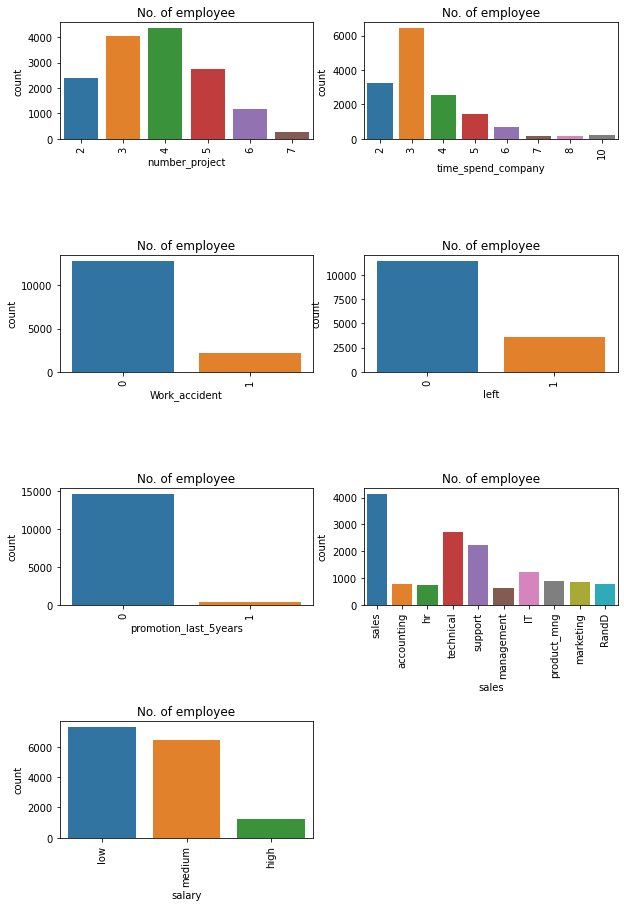

In [33]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data)
     plt.xticks(rotation=90)
     plt.title("No. of employee")

We can observe the following points in the above visualization:
1. Most of the employee is doing the project from 3–5.
2. There is a huge drop between 3 years and 4 years of experienced employees.
3. The no of employees left is 23 % of the total employment.
4. A very less number of employees get the promotion in the last 5 years.
5. The sales department is having a maximum no.of employee followed by technical and support
6. Most of the employees are getting a salary either medium or low.

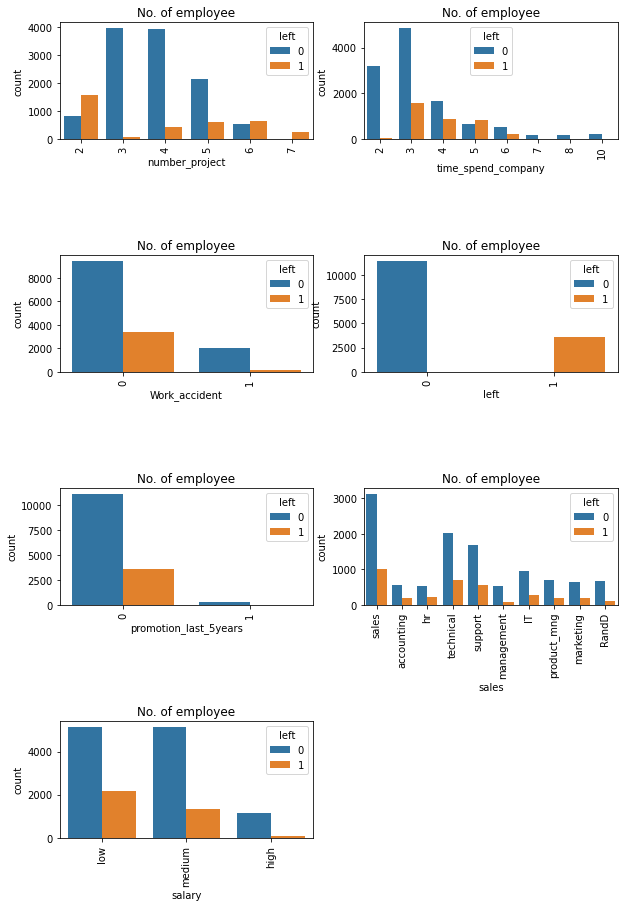

In [34]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data, hue='left')
     plt.xticks(rotation=90)
     plt.title("No. of employee")

1. Those employees who have a number of projects more than 5 were left the company.
2. Employees who have done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
3. Employees with five-year experience is leaving more because of no promotions in the last 5 years and more than 6 years of experience is not leaving because of affection with the company.
4. Those who promotion in the last 5 years, they didn’t leave i.e All those left they didn’t get the promotion in the last 5 years.

Data Analysis and Visualization Summary:

1. Promotions: Employees are far more likely to quit their job if they haven’t received a promotion in the last 5 years.
2. Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee’s career. most of them quit their job around the three-year mark. Another important point is the 6-years point, where the employee is very unlikely to leave.
3. Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3–5 project are less likely to leave the company. The employee with fewer and more projects likely to leave.
4. Salary: Most of the employees that quit among the mid or low salary groups.

Cluster analysis:

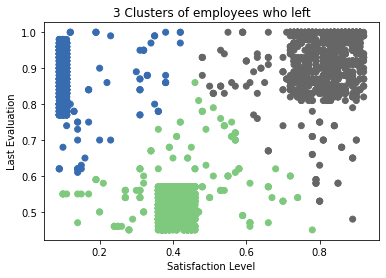

In [35]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

1. Employee who left the company can be grouped into 3 types of employees:
2. High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
3. Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
4. Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them ‘Bad match’

Building prediction model

In [36]:
#Pre-Processing Data
# Import LabelEncoder
from sklearn import preprocessing
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

In [37]:
#Split train and test set
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=data['left']
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

Dataset is broken into two parts in the ratio of 70:30. It means 70% of data will be used for model training and 30% for model testing.

Model Building

We are going to predict churn using Gradient Boosting Classifier.

In [38]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()
# Train the model using the training sets
gb.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = gb.predict(X_test)

Evaluating model performance

In [39]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


We got a classification rate of 97%, considered as good accuracy.

In recall If there is an employee who actually left present in the test set and your Gradient Boosting model is able to identify it 92% of the time.

In our prediction case, when our Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% time.